In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#importamos fichero local
from google.colab import files
uploaded = files.upload()

Saving housedata.csv to housedata.csv


In [3]:
house_data= pd.read_csv('housedata.csv')
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# 2.FASE DE EXPLORACION


En la fase de exploración de un dataset en Python, se busca entender las características y estructura de los datos para determinar los pasos posteriores en el análisis o procesamiento. Esto incluye:

1. Información general del dataset
Dimensiones: Número de filas y columnas (.shape).
Tipos de datos: Tipos de cada columna (.dtypes).
Nombre de las columnas: Usar .columns para listar los nombres.
Vista inicial: Primeras y últimas filas con .head() y .tail().
2. Calidad de los datos
Valores nulos o faltantes: Identificar columnas con datos ausentes (.isnull().sum()).
Valores duplicados: Detectar registros duplicados (.duplicated().sum()).
Formato inconsistente: Verificar formatos en columnas como fechas, texto, o categorías.
3. Estadísticas descriptivas
Resumen estadístico general: Uso de .describe() para variables numéricas (y a veces categóricas con include="all").
Distribuciones individuales: Análisis de métricas como media, mediana, moda, y percentiles.
Sesgo y curtosis: Evaluar distribuciones para entender su forma (scipy.stats.skew() y .kurtosis()).
4. Relaciones y correlaciones
Correlación entre variables: Matriz de correlación con .corr().
Análisis de contingencia: Para variables categóricas.
5. Análisis por tipos de datos
Numéricos:
Histogramas para visualizar distribuciones.
Boxplots para detectar outliers.
Categóricos:
Frecuencia de cada categoría (.value_counts()).
Fechas:
Distribución temporal, tendencias, estacionalidades.
Texto:
Longitud promedio, palabras comunes, caracteres especiales.
6. Identificación de outliers
Usar técnicas gráficas como boxplots y gráficos de dispersión.
Métodos estadísticos como rango intercuartílico (IQR) y puntuaciones z-score.
7. Patrones y dependencias iniciales
Análisis de correlaciones para identificar relaciones entre variables.
Visualización inicial con gráficos (como pairplots o scatterplots).
Herramientas y bibliotecas útiles:
Pandas: Para manipulación y análisis básico.
NumPy: Para cálculos numéricos adicionales.
Matplotlib y Seaborn: Para visualizaciones gráficas.
Scipy: Para análisis estadístico.
Missingno: Para visualización de datos faltan



# Informacion general de df

In [4]:
#INFORMACION GENERAL
print(house_data.shape)

(4600, 18)


In [5]:
tipo_columnas = house_data.dtypes
print(tipo_columnas)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [6]:
house_data['date'] = pd.to_datetime(house_data['date'], errors='coerce')

In [7]:
house_data.head()
tipo_columnas = house_data.dtypes
print(tipo_columnas)

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object


In [8]:
columnas = house_data.columns
print(columnas)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


**Resumen del Data Frame:**

* Registros: 4600   
* Columnas: 18
* Campos cualitativos: 5
* Campos Cuantitativos: 13
* Sistema de medicion: sqft pies cuadrados 1 = 0.09m2



# Calidad de datos de df

In [9]:
nulos = house_data.isnull().sum()
nulos
#SIN NULOS

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [10]:
duplicados = house_data.duplicated().sum()
duplicados

0

# Resumen estadístico general

In [11]:
estadisticos = house_data.describe().transpose()
estadisticos

,count,mean,min,25%,50%,75%,max,std
date,4600,2014-06-07 03:14:42.782608640,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,4600.0,551962.988473,0.0,322875.0,460943.461539,654962.5,26590000.0,563834.702547
bedrooms,4600.0,3.40087,0.0,3.0,3.0,4.0,9.0,0.908848
bathrooms,4600.0,2.160815,0.0,1.75,2.25,2.5,8.0,0.783781
sqft_living,4600.0,2139.346957,370.0,1460.0,1980.0,2620.0,13540.0,963.206916
sqft_lot,4600.0,14852.516087,638.0,5000.75,7683.0,11001.25,1074218.0,35884.436145
floors,4600.0,1.512065,1.0,1.0,1.5,2.0,3.5,0.538288
waterfront,4600.0,0.007174,0.0,0.0,0.0,0.0,1.0,0.084404
view,4600.0,0.240652,0.0,0.0,0.0,0.0,4.0,0.778405
condition,4600.0,3.451739,1.0,3.0,3.0,4.0,5.0,0.67723


# Correlación entre variables

La matriz de correlación mide la relación lineal entre variables, con valores entre -1 y 1:

* 1 indica correlación positiva perfecta (cuando una aumenta, la otra también).
* -1 indica correlación negativa perfecta (cuando una aumenta, la otra disminuye).
* 0 indica que no hay correlación lineal.

In [12]:
correlacion = house_data.select_dtypes(include=['number']).corr()
print(correlacion)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

1. Precio (price):

* Correlaciones positivas:
sqft_living (0.43): Más pies cuadrados de vivienda están relacionados con precios más altos.
sqft_above (0.37): Similar a sqft_living, aunque ligeramente menor.
bathrooms (0.33): Más baños se asocian con precios más altos.
view (0.23): Mejores vistas influyen en el precio.

* Correlaciones bajas:
waterfront (0.14): Propiedades frente al agua tienen una influencia limitada.
bedrooms (0.20): Más habitaciones no siempre significan mayor precio.

* Correlación débil con sqft_lot (0.05): El tamaño del lote no afecta mucho al precio.

2. Superficie (sqft_living, sqft_above, sqft_basement):

* sqft_living tiene la correlación más alta con price (0.43).
sqft_above está altamente correlacionado con sqft_living (0.88), indicando que ambos están fuertemente relacionados.

3. Características físicas:

* bathrooms correlaciona más con sqft_living (0.76) que con price (0.33), sugiriendo que los baños están más influenciados por el tamaño que por el valor.

* floors tiene una correlación moderada con bathrooms (0.49), lo que implica que las casas con más pisos tienden a tener más baños.

4. Año de construcción (yr_built) y renovaciones (yr_renovated):

* yr_built tiene una correlación baja con el precio (0.02), indicando que el año de construcción no es un factor determinante.

* yr_renovated tiene una correlación negativa débil con el precio (-0.03), posiblemente porque muchas casas no están renovadas.

Conclusión:

1. Las variables más influyentes para el precio son sqft_living, sqft_above, y bathrooms.
2. Variables como view y waterfront también tienen un impacto, aunque menor.
3. bedrooms, condition, y yr_built tienen poca correlación directa con el precio.

#3.FASE DE EXPLORACION VISUAL

Mapa de Calor de Correlación

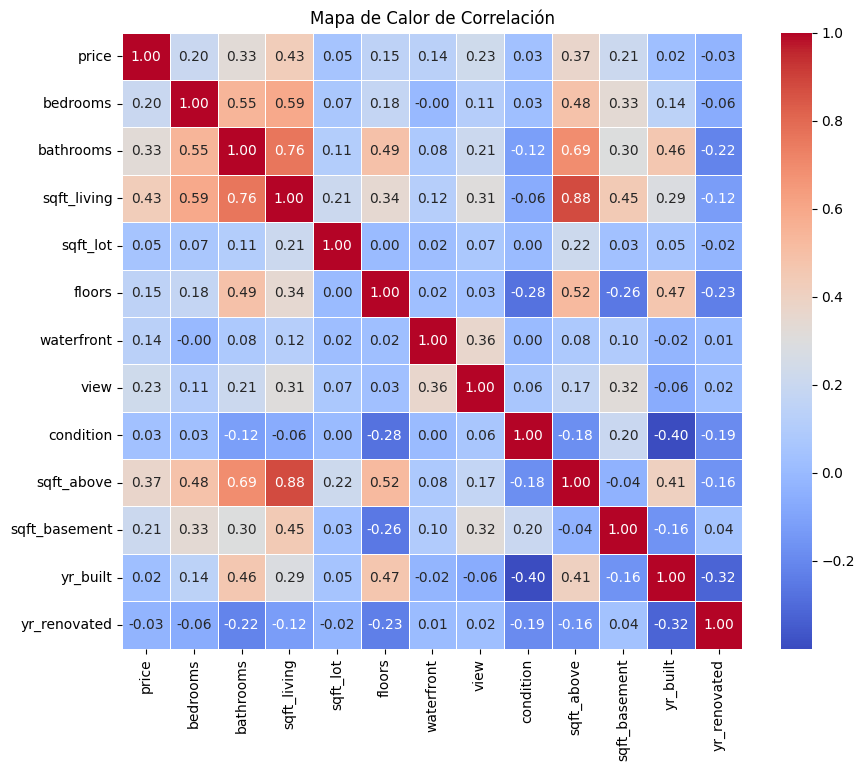

In [13]:
numeric_data = house_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

* Factores Influencers: La superficie habitable y los baños son factores más influyentes en el precio de las propiedades que el número de habitaciones o la antigüedad de la propiedad.

* Redundancia en Variables: La alta correlación entre "sqft_living" y "sqft_above" podría justificar la eliminación de una de estas variables en análisis posteriores para evitar multicolinealidad.

* Análisis Adicional: Este mapa de calor sirve como punto de partida para explorar más a fondo las relaciones entre variables y podría facilitar la creación de modelos predictivos para el precio de las propiedades.

Distribución de los Precios

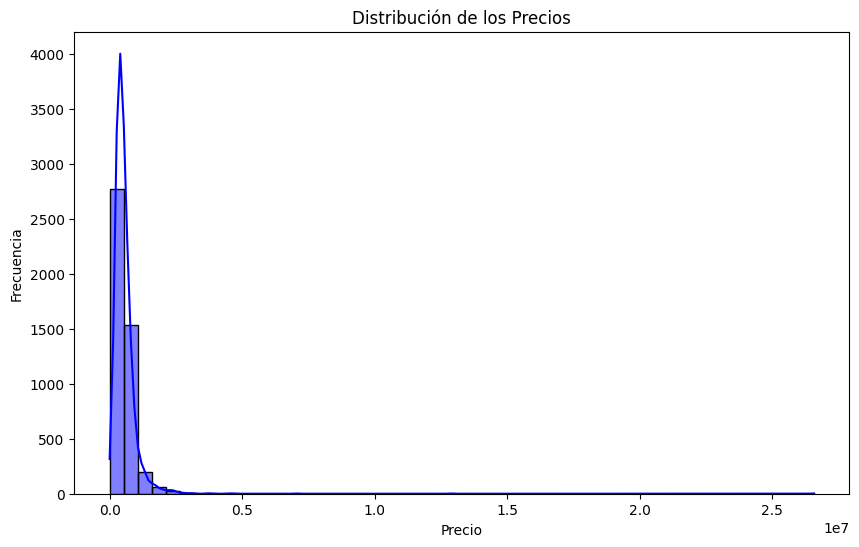

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(house_data['price'], bins=50, kde=True, color='blue')
plt.title("Distribución de los Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()



* la gráfica muestra que la distribución de los precios está muy sesgada hacia la izquierda debido a la presencia de valores atípicos (outliers) con precios extremadamente altos. Esto puede dificultar el análisis.




Relación entre Precio y Superficie

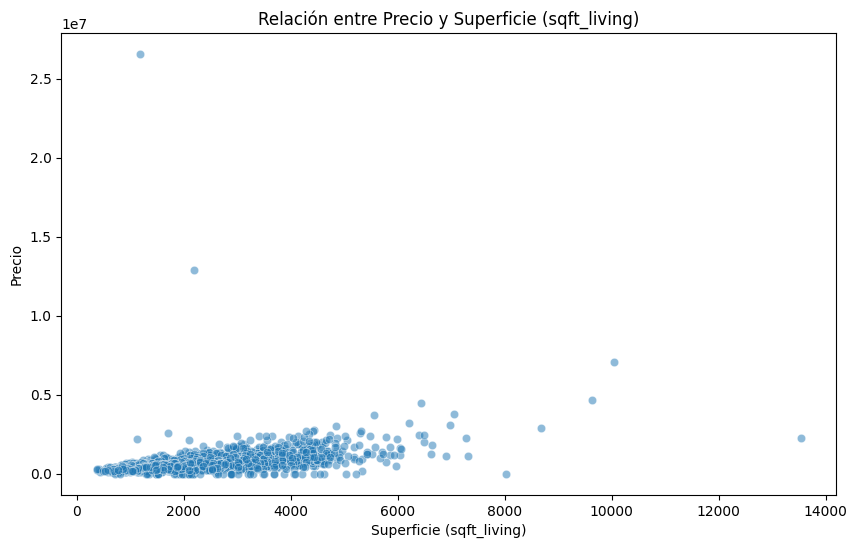

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=house_data['sqft_living'], y=house_data['price'], alpha=0.5)
plt.title("Relación entre Precio y Superficie (sqft_living)")
plt.xlabel("Superficie (sqft_living)")
plt.ylabel("Precio")
plt.show()

* Relación entre precio y superficie (sqft_living):
Observamos una relación positiva: a medida que aumenta la superficie habitable, el precio también tiende a aumentar. Sin embargo, hay valores atípicos que podrían necesitar mayor análisis.

Boxplot de Precio por Número de Habitaciones

<ipython-input-16-509e4a8d9312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=house_data['bedrooms'], y=house_data['price'], palette="Set3")


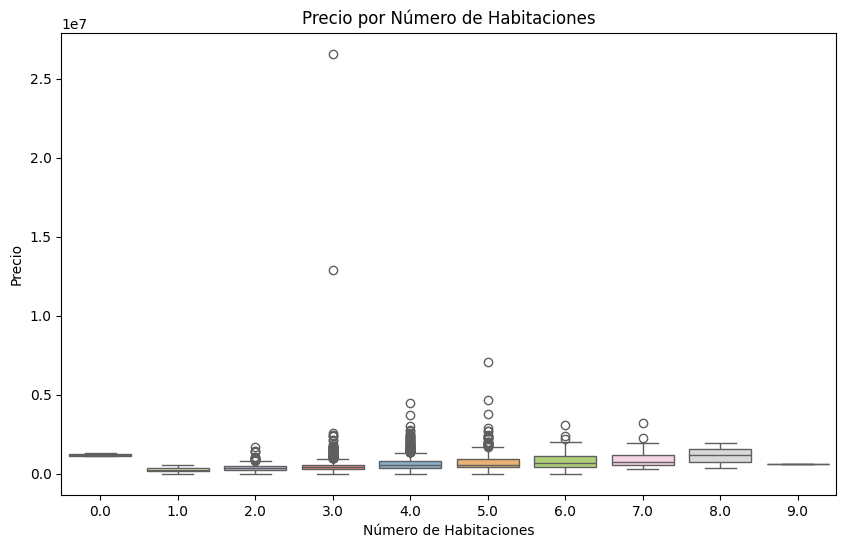

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=house_data['bedrooms'], y=house_data['price'], palette="Set3")
plt.title("Precio por Número de Habitaciones")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio")
plt.show()

* Precio por número de habitaciones:
El diagrama de cajas muestra la mediana y la distribución de precios para cada cantidad de habitaciones. Aunque el precio tiende a aumentar con más habitaciones, no siempre es proporcional, ya que también hay valores atípicos que destacan.

Relación entre Precio y Año de Construcción

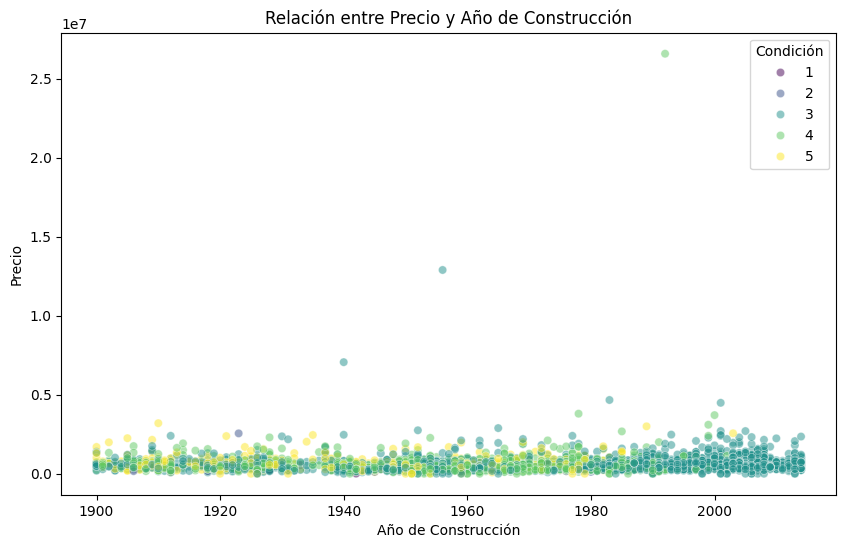

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=house_data['yr_built'], y=house_data['price'], alpha=0.5, hue=house_data['condition'], palette='viridis')
plt.title("Relación entre Precio y Año de Construcción")
plt.xlabel("Año de Construcción")
plt.ylabel("Precio")
plt.legend(title="Condición")
plt.show()

* La relación entre el precio y el año de construcción no parece ser totalmente lineal. Si bien las casas más modernas tienden a tener precios más altos, esto no es una regla absoluta.

Precio según Vista o Frente al Agua

<ipython-input-18-1694846d3cfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house_data['view'], y=house_data['price'], palette="mako")


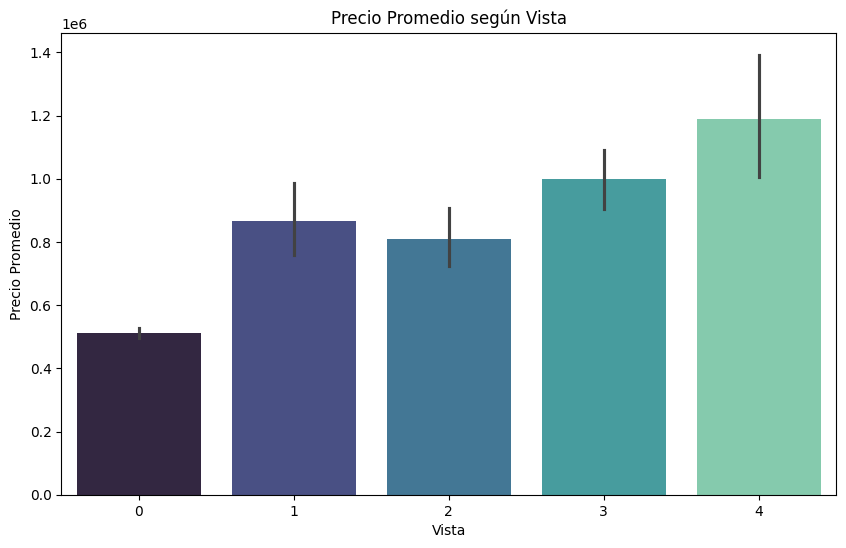

<ipython-input-18-1694846d3cfd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house_data['waterfront'], y=house_data['price'], palette="cool")


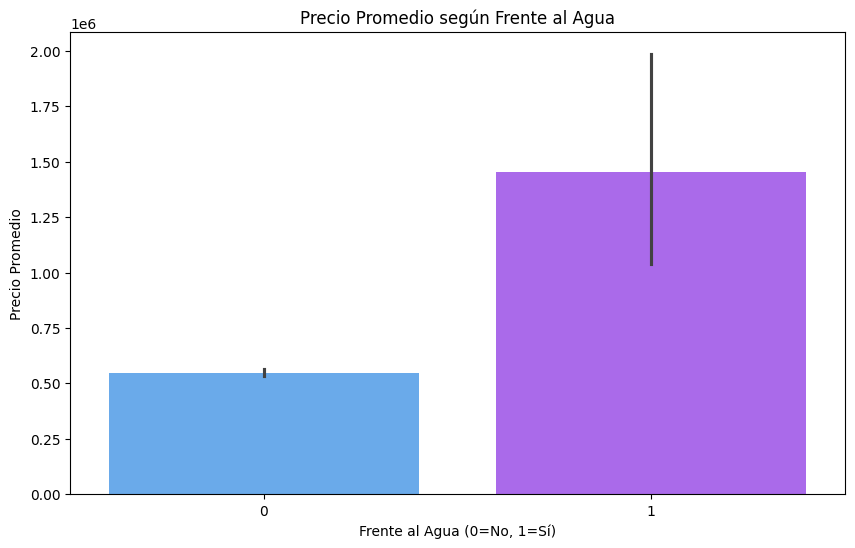

In [18]:
# Precio promedio según vista
plt.figure(figsize=(10, 6))
sns.barplot(x=house_data['view'], y=house_data['price'], palette="mako")
plt.title("Precio Promedio según Vista")
plt.xlabel("Vista")
plt.ylabel("Precio Promedio")
plt.show()

# Precio promedio según frente al agua
plt.figure(figsize=(10, 6))
sns.barplot(x=house_data['waterfront'], y=house_data['price'], palette="cool")
plt.title("Precio Promedio según Frente al Agua")
plt.xlabel("Frente al Agua (0=No, 1=Sí)")
plt.ylabel("Precio Promedio")
plt.show()

*  Las propiedades con mejores vistas tienden a ser valoradas más alto, lo que puede influir en las decisiones de compra de los compradores.

# 4.MODELOS DE REGRSION LINEAL

# Entrenamiento y validacion

Hipótesis 1: Utilizando Solo Variables Numéricas

In [19]:
# HIPÓTESIS 1: Modelo de regresión lineal mejorado con variables numéricas relevantes

# Importar bibliotecas necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleccionar variables independientes (incluyendo más variables)
# Asegúrate de incluir todas las que parezcan relevantes según el análisis anterior.
X_h1 = house_data[['sqft_living', 'bathrooms', 'sqft_lot', 'bedrooms', 'condition', 'yr_built', 'sqft_above', 'view']]
y_h1 = house_data['price']  # Variable dependiente

# Manejo de valores atípicos (opcional)
# Puedes establecer un límite superior para los precios, por ejemplo:
Q1 = house_data['price'].quantile(0.25)
Q3 = house_data['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
house_data_filtered = house_data[house_data['price'] <= upper_bound]

# Ajustar X y y a los datos filtrados
X_h1_filtered = house_data_filtered[['sqft_living', 'bathrooms', 'sqft_lot', 'bedrooms', 'condition', 'yr_built', 'sqft_above', 'view']]
y_h1_filtered = house_data_filtered['price']

# División en conjunto de entrenamiento y de prueba
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split(X_h1_filtered, y_h1_filtered, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo_h1 = LinearRegression()

# Entrenar el modelo
modelo_h1.fit(X_train_h1, y_train_h1)

# Predicciones
predicciones_train_h1 = modelo_h1.predict(X_train_h1)
predicciones_test_h1 = modelo_h1.predict(X_test_h1)

# Calcular el Error Cuadrático Medio (MSE)
mse_train_h1 = mean_squared_error(y_train_h1, predicciones_train_h1)
mse_test_h1 = mean_squared_error(y_test_h1, predicciones_test_h1)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 1): {mse_train_h1:.2f}')
print(f'Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 1): {mse_test_h1:.2f}')

Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 1): 30065614068.13
Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 1): 29964098771.81


HIPÓTESIS 2: Normalización de la variable objetivo (price)

In [20]:
# HIPÓTESIS 2: Normalización de la variable objetivo (price)

from sklearn.preprocessing import MinMaxScaler

# Copia de los datos originales
house_data_normalized = house_data.copy()

# Normalizar la variable objetivo
scaler = MinMaxScaler()
house_data_normalized['price_normalized'] = scaler.fit_transform(house_data[['price']])

# Definir las variables independientes (usando algunas variables numéricas)
X_h2 = house_data_normalized[['sqft_living', 'bathrooms', 'sqft_lot', 'bedrooms', 'condition', 'yr_built']]
y_h2 = house_data_normalized['price_normalized']  # Usar variable normalizada como dependiente

# División en conjunto de entrenamiento y conjunto de prueba
X_train_h2, X_test_h2, y_train_h2, y_test_h2 = train_test_split(X_h2, y_h2, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal y entrenarlo
modelo_h2 = LinearRegression()
modelo_h2.fit(X_train_h2, y_train_h2)

# Predicciones
predicciones_train_h2 = modelo_h2.predict(X_train_h2)
predicciones_test_h2 = modelo_h2.predict(X_test_h2)

# Cálculo del MSE
mse_train_h2 = mean_squared_error(y_train_h2, predicciones_train_h2)
mse_test_h2 = mean_squared_error(y_test_h2, predicciones_test_h2)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 2): {mse_train_h2:.2f}')
print(f'Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 2): {mse_test_h2:.2f}')

Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 2): 0.00
Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 2): 0.00


HIPÓTESIS 3: Normalizando todas las variables numéricas antes de ajustar el modelo

In [21]:
# HIPÓTESIS 3: Normalizando todas las variables numéricas antes de ajustar el modelo

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Asegurarte de que la columna 'date' se haya convertido a datetime
house_data['date'] = pd.to_datetime(house_data['date'], errors='coerce')

# Seleccionamos solo las columnas numéricas (excluyendo la columna 'date')
numeric_columns = house_data.select_dtypes(include=['float64', 'int64']).columns

# Preparamos X e y excluyendo la variable de fecha
X_h3 = house_data[numeric_columns].drop('price', axis=1)
y_h3 = house_data['price']

# Escalar la variable objetivo
scaler = StandardScaler()
y_h3_scaled = scaler.fit_transform(y_h3.values.reshape(-1, 1)).flatten()  # Normaliza la variable objetivo

# División en conjunto de entrenamiento y de prueba
X_train_h3, X_test_h3, y_train_h3, y_test_h3 = train_test_split(X_h3, y_h3_scaled, test_size=0.20, random_state=43)

# Crear el modelo de regresión lineal y entrenarlo
modelo_h3 = LinearRegression()
modelo_h3.fit(X_train_h3, y_train_h3)

# Predicciones
predicciones_train_h3 = modelo_h3.predict(X_train_h3)
predicciones_test_h3 = modelo_h3.predict(X_test_h3)

# Cálculo del MSE
mse_train_h3 = mean_squared_error(y_train_h3, predicciones_train_h3)
mse_test_h3 = mean_squared_error(y_test_h3, predicciones_test_h3)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 3): {mse_train_h3:.2f}')
print(f'Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 3): {mse_test_h3:.2f}')

Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 3): 0.92
Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 3): 0.24


HIPÓTESIS 4: Incluyendo interacciones entre variables

In [22]:
# HIPÓTESIS 4: Incluyendo interacciones entre variables

# Crear nuevas variables de interacción
house_data['sqft_bedrooms_interaction'] = house_data['sqft_living'] * house_data['bedrooms']

# Seleccionar variables independientes incluyendo las interacciones
X_h4 = house_data[['sqft_living', 'bathrooms', 'sqft_lot', 'bedrooms', 'condition', 'yr_built', 'sqft_bedrooms_interaction']]
y_h4 = house_data['price']

# División en conjunto de entrenamiento y conjunto de prueba
X_train_h4, X_test_h4, y_train_h4, y_test_h4 = train_test_split(X_h4, y_h4, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal y entrenarlo
modelo_h4 = LinearRegression()
modelo_h4.fit(X_train_h4, y_train_h4)

# Predicciones
predicciones_train_h4 = modelo_h4.predict(X_train_h4)
predicciones_test_h4 = modelo_h4.predict(X_test_h4)

# Cálculo del MSE
mse_train_h4 = mean_squared_error(y_train_h4, predicciones_train_h4)
mse_test_h4 = mean_squared_error(y_test_h4, predicciones_test_h4)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 4): {mse_train_h4:.2f}')
print(f'Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 4): {mse_test_h4:.2f}')

Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 4): 67783268733.78
Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 4): 988796584834.44


# 5.ANALISIS DE HIPÓTESIS




# **Resumen General**

1. Hipótesis 1 ofrece un análisis básico, pero su rendimiento es insatisfactorio. Las transformaciones y selecciones de variables son clave.

2. Hipótesis 2 resultó en predicciones perfectas, lo cual es indicativo de problemas en la preparación de los datos y no es un resultado útil.

3. Hipótesis 3 muestra una mejora notable, sugiriendo que el ajuste y la normalización de las variables son importantes para las predicciones.

4. Hipótesis 4 retrata cómo malas decisiones de normalización o la inclusión de variables irrelevantes pueden deteriorar el rendimiento del modelo.

De acuerdo, a lo analizado. Se desarrollo una hipotesis numero 5 pensando en  tomar el logaritmo de price, sqft_living que presentan una distribución sesgada. Esto puede ayudar a estabilizar la varianza y hacer que las relaciones sean más lineales.


Hipótesis 5: Transformación de Variables Numérica

Objetivo: Aplicar transformaciones a las variables numéricas (como logaritmos o raíces cuadradas) para manejar la asimetría y mejorar la linealidad del modelo.

In [23]:
# Cargar los datos
house_data = pd.read_csv('housedata.csv')

# Asegurarte de que los valores seleccionados no tengan cero o valores negativos
# Asumiendo que la 'price' y 'sqft_living' son las columnas de interés.
house_data = house_data[(house_data['price'] > 0) & (house_data['sqft_living'] > 0)]

# Aplicar la transformación logarítmica a las variables seleccionadas
house_data['log_price'] = np.log(house_data['price'])
house_data['log_sqft_living'] = np.log(house_data['sqft_living'])

# Definir las variables independientes (X) y la variable dependiente (y)
X_h5 = house_data[['log_sqft_living', 'bathrooms', 'sqft_lot', 'bedrooms', 'condition', 'yr_built', 'sqft_above']]
y_h5 = house_data['log_price']  # Variable dependiente transformada

# División en conjunto de entrenamiento y de prueba
X_train_h5, X_test_h5, y_train_h5, y_test_h5 = train_test_split(X_h5, y_h5, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal y entrenarlo
modelo_h6 = LinearRegression()
modelo_h6.fit(X_train_h5, y_train_h5)

# Predicciones
predicciones_train_h5 = modelo_h6.predict(X_train_h5)
predicciones_test_h5 = modelo_h6.predict(X_test_h5)

# Cálculo del Error Cuadrático Medio (MSE)
mse_train_h5 = mean_squared_error(y_train_h5, predicciones_train_h5)
mse_test_h5 = mean_squared_error(y_test_h5, predicciones_test_h5)

# Imprimir resultados
print(f'Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 5): {mse_train_h5:.2f}')
print(f'Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 5): {mse_test_h5:.2f}')


Error Cuadrático Medio (MSE) para el conjunto de entrenamiento (Hipótesis 5): 0.14
Error Cuadrático Medio (MSE) para el conjunto de prueba (Hipótesis 5): 0.15


# 6.HIPÓTESIS FINAL

**La Hipótesis 5** evidencia que transformar las variables numéricas (especialmente el precio) ha tenido un efecto muy positivo en el ajuste y rendimiento del modelo. Con un MSE tan bajo, estás en una buena dirección y quizás estés preparado para comparar estos resultados con los de las otras hipótesis o probar nuevas rutas de análisis. ¡Sigue así! Si deseas explorar algo específico o implementar más cambios, no dudes en decírmelo.